In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# let loads the Boston House Pricing Dataset

In [7]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [8]:
house_price_dataset = fetch_california_housing()

In [9]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [10]:
# loading the dataset to a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns=house_price_dataset.feature_names)

In [11]:
# print first 5 rows of our dataframe
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
# add the target (price) column to the dataframe
house_price_dataframe['Price'] = house_price_dataset.target

In [13]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
# checking the number of rows and column in the dataframe
house_price_dataframe.shape

(20640, 9)

In [15]:
# checking for missing values
house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [16]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [17]:
correlation = house_price_dataframe.corr()

<Axes: >

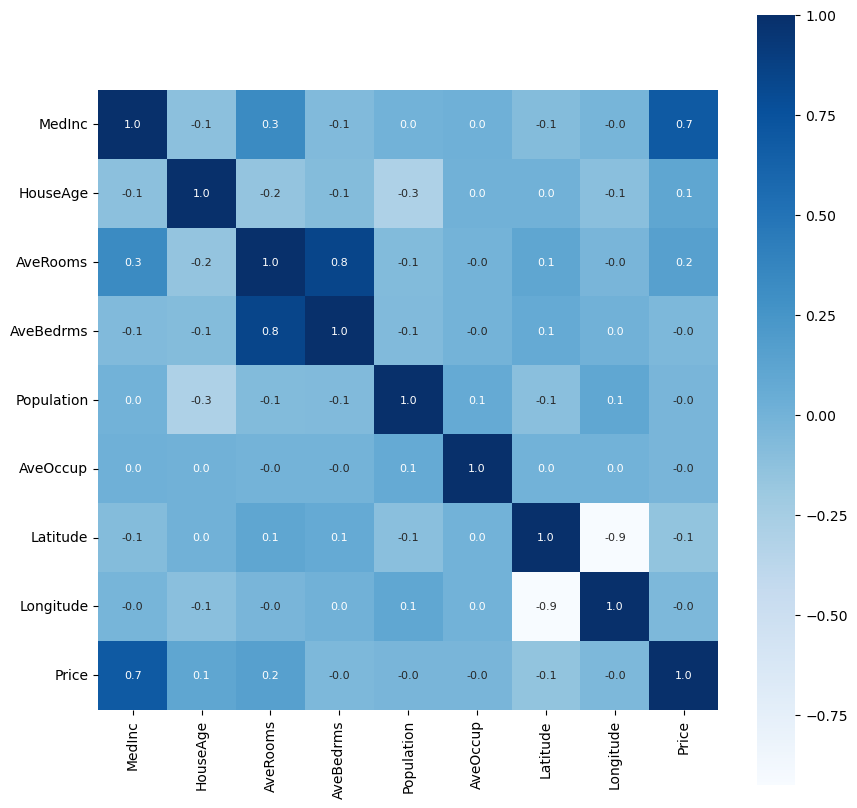

In [18]:
# constructing a heatmap to understand the coorelation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and target

In [19]:
X = house_price_dataframe.drop(['Price'], axis=1)
Y = house_price_dataframe['Price']

In [20]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Spliting the data into Traning data and Test data

In [21]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)

In [22]:
print(X.shape,X_train.shape,X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


Model Training

In [24]:
## standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train=scaler.fit_transform(X_train)

In [26]:
X_test=scaler.transform(X_test)

In [27]:
X_train

array([[-1.25840302, -1.79593875, -0.42518485, ...,  0.0246598 ,
         0.53456377, -0.13763472],
       [ 1.61062276, -1.63717833,  0.24734442, ..., -0.04986686,
        -0.90997894,  0.8798355 ],
       [-1.22042472, -0.28771479, -0.58088018, ...,  0.11615486,
         0.45509054, -0.31220069],
       ...,
       [ 0.33367493, -0.76399604,  0.21369057, ..., -0.02463262,
         1.53966629, -0.8259234 ],
       [-0.68091096,  0.82360812, -0.79919493, ...,  0.01949588,
        -0.68558395,  0.71025713],
       [-0.85374129,  0.18856645, -0.12676178, ..., -0.00758109,
         2.41854664, -2.27731475]])

# Model Training

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
regression = LinearRegression()

In [30]:
regression.fit(X_train,Y_train)

LinearRegression()

In [31]:
# print the coefficient and the intercept

print(regression.coef_)

[ 0.83479239  0.11496024 -0.25904127  0.27855466 -0.00776905 -0.04478016
 -0.88126359 -0.85119058]


In [32]:
print(regression.intercept_)

2.065092514534886


In [34]:
# on which parameter the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [35]:
## prediction with Test Data

reg_pred = regression.predict(X_test)

In [36]:
reg_pred

array([2.80991017, 1.25276895, 1.44720173, ..., 1.57213375, 1.43077765,
       2.60233972])

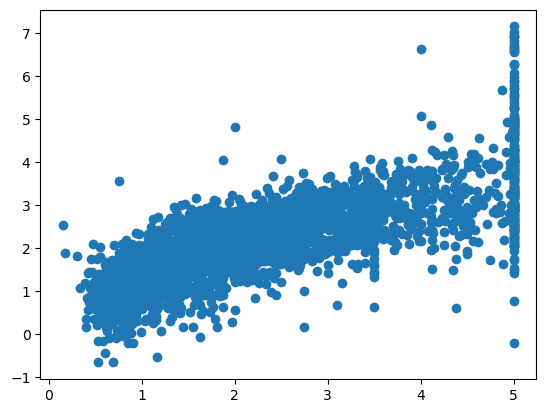

In [39]:
##plot a scatter plot for the prediction
plt.scatter(Y_test,reg_pred)

In [40]:
# Residulas error
residuals=Y_test-reg_pred


In [41]:
residuals

10385   -0.022910
1943     0.823231
7490    -0.480202
16889    1.054071
11416    0.481368
           ...   
13767   -0.513476
20606   -0.141012
7340     0.187866
14312   -0.657778
20262   -0.248340
Name: Price, Length: 4128, dtype: float64

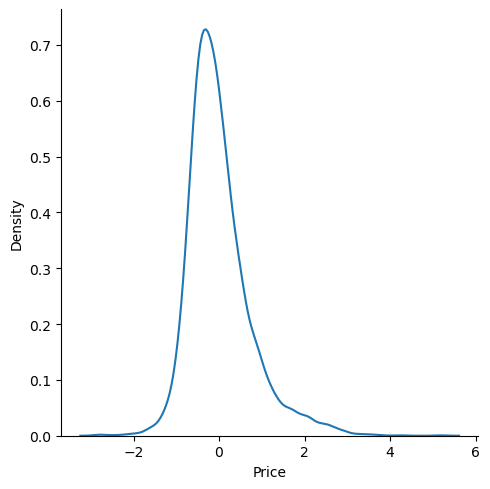

In [42]:
## plot this residulas
import seaborn as sns
sns.displot(residuals,kind="kde")

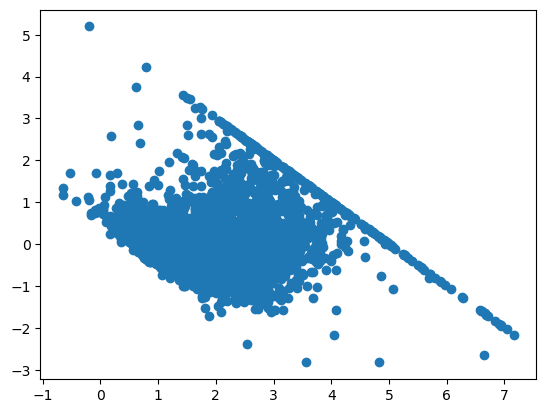

In [43]:
## scatter plot with respect to prediction and reiduals

plt.scatter(reg_pred,residuals)

In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(Y_test,reg_pred))
print(mean_squared_error(Y_test,reg_pred))
print(np.sqrt(mean_squared_error(Y_test,reg_pred)))

0.5358292549657769
0.5369436868087003
0.7327644142619784


## R square and adjuted R square

In [48]:
from sklearn.metrics import r2_score
score=r2_score(Y_test,reg_pred)
print(score)

0.6013853272055154


In [49]:
# display adjusted R-squared
1- (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6006111302202384

NEW data Prediction

In [55]:
(house_price_dataset.data[0].reshape(1,-1))

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [53]:
regression.predict(house_price_dataset.data[0].reshape(1,-1))

array([80.24697524])

# Pickling The Model file For Deployment

In [57]:
import pickle

In [58]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [59]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [60]:
#3 prediction
pickled_model.predict(scaler.transform(house_price_dataset.data[0].reshape(1,-1)))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.13572061])